In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


In [77]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

# Data Preprocessing

In [78]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

There is  ? data ,needs to be replaced with null value

In [79]:
df.shape

(1000, 40)

In [80]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [82]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for i in df:
    for j in search:
        print(f"{j} in {i} = ",end= " ")
        print((df[i] == j).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


 ? in property_damage =  0
 - in property_damage =  0
?  in property_damage =  0
-  in property_damage =  0
 ?  in property_damage =  0
 -  in property_damage =  0
NA in property_damage =  0
N/A in property_damage =  0
 NA in property_damage =  0
 N/A in property_damage =  0
  in bodily_injuries =  0
? in bodily_injuries =  0
- in bodily_injuries =  0
 ? in bodily_injuries =  0
 - in bodily_injuries =  0
?  in bodily_injuries =  0
-  in bodily_injuries =  0
 ?  in bodily_injuries =  0
 -  in bodily_injuries =  0
NA in bodily_injuries =  0
N/A in bodily_injuries =  0
 NA in bodily_injuries =  0
 N/A in bodily_injuries =  0
  in witnesses =  0
? in witnesses =  0
- in witnesses =  0
 ? in witnesses =  0
 - in witnesses =  0
?  in witnesses =  0
-  in witnesses =  0
 ?  in witnesses =  0
 -  in witnesses =  0
NA in witnesses =  0
N/A in witnesses =  0
 NA in witnesses =  0
 N/A in witnesses =  0
  in police_report_available =  0
? in police_report_available =  343
- in police_report_avail

(i) in_property_damage 360 ?

(ii) in_police_report_available 343 ?

(iii) collision_type 178

In [83]:
#replacing the ? with null value
df.replace({'?': np.nan}, inplace =True)

In [84]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There is no data in _C39 , so we will drop it

In [85]:
df.drop(columns=['policy_number','policy_csl','incident_date','_c39','insured_zip'],inplace=True)

In [86]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [87]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [88]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [89]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [90]:
df['month']=df['policy_bind_date'].apply(lambda x:x.month)

In [91]:
df['day']=df['policy_bind_date'].apply(lambda x:x.day)

In [92]:
df['year']=df['policy_bind_date'].apply(lambda x:x.year)

In [93]:
df.drop('policy_bind_date',inplace=True,axis=1)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [95]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

# EDA

In [96]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year        month          day         year  
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    37928.950000  2005.103000     6.559000    15.448000  2001.604000  
std     18886.252893     6.015861     3.391758     8.850176     7.360391  
min        70.000000  1995.000000     1.000000     1.000000  1990.000000  
25%     30292.500000  2000.000000     4.000000     8.000000  1995.000000  
50%     42100.000000  2005.000000     7.000000    16.000000  2002.000000  
75%     50822.500000  2010.000000     9.000000    23.000000  2008.000000  
max     79560.000000  2015.000000    12.000000    31.000000  2015.000000

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

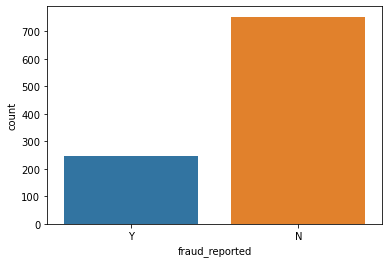

In [97]:
sns.countplot(x='fraud_reported',data=df)

(i) There is class imbalance

(ii) 24% are found fraud

In [98]:
plt.pie(x=df['policy_state'].value_counts(),labels=df['policy_state'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('policy_state',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

OH-35.2%
IL- 33.8%
IN - 31%

In [99]:
plt.pie(x=df['police_report_available'].value_counts(),labels=df['police_report_available'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('police_report_available',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

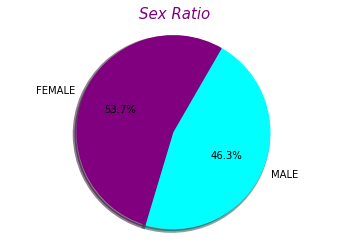

In [100]:
plt.pie(x=df['insured_sex'].value_counts(),labels=df['insured_sex'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['purple','cyan'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Sex Ratio',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

53% are female and 46.3% are male among the insured customers

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

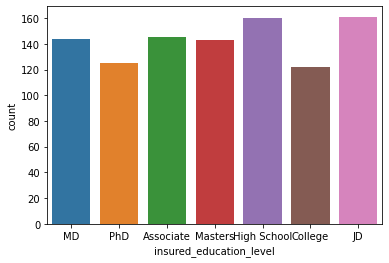

In [101]:
sns.countplot(x='insured_education_level',data=df)

Although education level is not so valuable feature for prediction as all
the categories are almost equal but Lower educated people claimed more

In [102]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='insured_occupation',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'craft-repair'),
 Text(1, 0, 'machine-op-inspct'),
 Text(2, 0, 'sales'),
 Text(3, 0, 'armed-forces'),
 Text(4, 0, 'tech-support'),
 Text(5, 0, 'prof-specialty'),
 Text(6, 0, 'other-service'),
 Text(7, 0, 'priv-house-serv'),
 Text(8, 0, 'exec-managerial'),
 Text(9, 0, 'protective-serv'),
 Text(10, 0, 'transport-moving'),
 Text(11, 0, 'handlers-cleaners'),
 Text(12, 0, 'adm-clerical'),
 Text(13, 0, 'farming-fishing')]

(i) Occupation with Machine-op-Inspect has  claimed the highest number

(ii) People with occupation farming-fishing ,handlers-cleaners has 
claimed comparitively less time

In [103]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='insured_hobbies',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'sleeping'),
 Text(1, 0, 'reading'),
 Text(2, 0, 'board-games'),
 Text(3, 0, 'bungie-jumping'),
 Text(4, 0, 'base-jumping'),
 Text(5, 0, 'golf'),
 Text(6, 0, 'camping'),
 Text(7, 0, 'dancing'),
 Text(8, 0, 'skydiving'),
 Text(9, 0, 'movies'),
 Text(10, 0, 'hiking'),
 Text(11, 0, 'yachting'),
 Text(12, 0, 'paintball'),
 Text(13, 0, 'chess'),
 Text(14, 0, 'kayaking'),
 Text(15, 0, 'polo'),
 Text(16, 0, 'basketball'),
 Text(17, 0, 'video-games'),
 Text(18, 0, 'cross-fit'),
 Text(19, 0, 'exercise')]

(i) The analysis show people has reading as hobby are prone to accident

(ii) Busketball and crossfit lover are less prone to accident

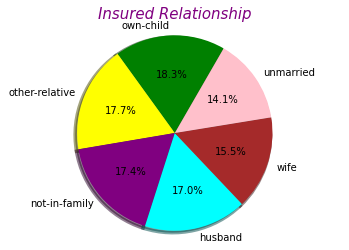

In [104]:
plt.pie(x=df['insured_relationship'].value_counts(),labels=df['insured_relationship'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['green','yellow','purple','cyan','brown','pink'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Insured Relationship',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

Automobile owner who is ow-child has made more claim

In [105]:
df['incident_location'].value_counts().sort_values(ascending=False)

9935 4th Drive         1
6582 Elm Lane          1
4687 5th Drive         1
2100 Francis Drive     1
7121 Francis Lane      1
                      ..
6516 Solo Drive        1
6045 Andromedia St     1
3092 Texas Drive       1
7629 5th St            1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

incident location are too lengthy 

In [106]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='incident_state',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'SC'),
 Text(1, 0, 'VA'),
 Text(2, 0, 'NY'),
 Text(3, 0, 'OH'),
 Text(4, 0, 'WV'),
 Text(5, 0, 'NC'),
 Text(6, 0, 'PA')]

(i) Highest number of accident occured at NY followed by SC, WV

(ii) OH has minimum number of accident as per claimed insurance

[Text(0, 0, 'Columbus'),
 Text(1, 0, 'Riverwood'),
 Text(2, 0, 'Arlington'),
 Text(3, 0, 'Springfield'),
 Text(4, 0, 'Hillsdale'),
 Text(5, 0, 'Northbend'),
 Text(6, 0, 'Northbrook')]

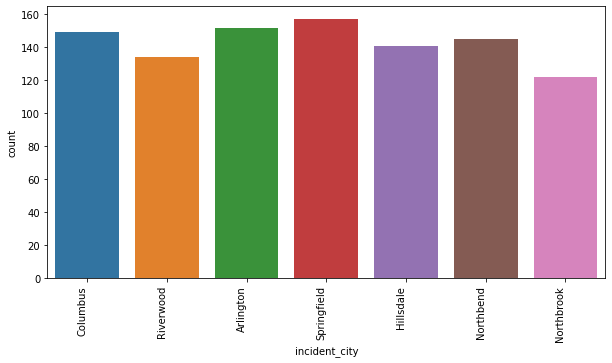

In [107]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='incident_city',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

The highest number of incident happend at Springfield

In [108]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='property_damage',hue='insured_sex',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'YES'), Text(1, 0, 'NO')]

In more than double cases property not been damaged



In [109]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='auto_make',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'Saab'),
 Text(1, 0, 'Mercedes'),
 Text(2, 0, 'Dodge'),
 Text(3, 0, 'Chevrolet'),
 Text(4, 0, 'Accura'),
 Text(5, 0, 'Nissan'),
 Text(6, 0, 'Audi'),
 Text(7, 0, 'Toyota'),
 Text(8, 0, 'Ford'),
 Text(9, 0, 'Suburu'),
 Text(10, 0, 'BMW'),
 Text(11, 0, 'Jeep'),
 Text(12, 0, 'Honda'),
 Text(13, 0, 'Volkswagen')]

(i) Saab,Dodge,Suburu,Nissan these are at top for 
isurance claimed

(ii) Hinda, Mercedes, Jeep at bottom for insurance claimed

In [110]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x='month',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

Highest number of insurance claimed in monsoon season

In [111]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='total_claim_amount'>

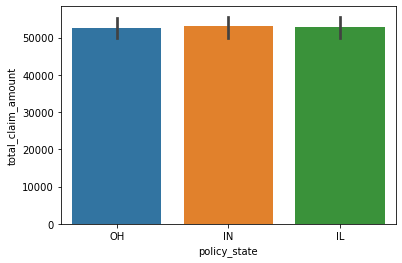

In [112]:
sns.barplot(x='policy_state',y='total_claim_amount',data=df)

[Text(0, 0, 'Single Vehicle Collision'),
 Text(1, 0, 'Vehicle Theft'),
 Text(2, 0, 'Multi-vehicle Collision'),
 Text(3, 0, 'Parked Car')]

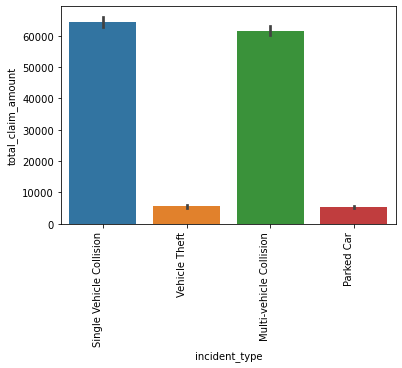

In [113]:
chart=sns.barplot(x='incident_type',y='total_claim_amount',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) Major reason of insurance claim is collision which inccludes
single vehicle and multivehicles

(ii) Vehicle and Parked Car are very less as reason
of insurance claim

In [176]:
chart=sns.barplot(x='day',y='total_claim_amount',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31')]

In [177]:
sns.countplot(df['day'])

<AxesSubplot:xlabel='day', ylabel='count'>

Day wise distribution of insurance claimed

[Text(-5000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(15000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(25000.0, 0, '')]

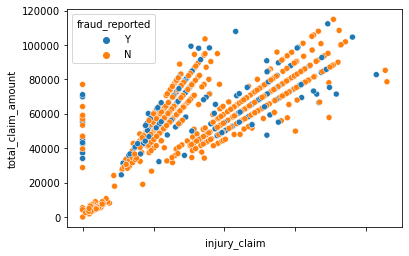

In [114]:
chart=sns.scatterplot(x='injury_claim',y='total_claim_amount',hue='fraud_reported',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) The more injury claim the total_claim_amount is more

(ii) Lower amount claimed (injury claimed)likely not to be fraud

[Text(-10000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(70000.0, 0, ''),
 Text(80000.0, 0, ''),
 Text(90000.0, 0, '')]

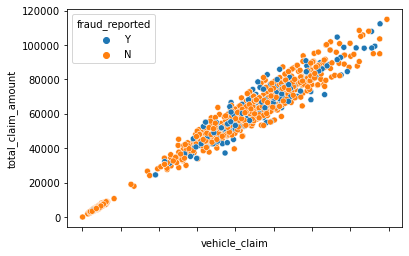

In [115]:
chart=sns.scatterplot(x='vehicle_claim',y='total_claim_amount',hue='fraud_reported',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Vehicle claim is highly correlated in total claimed amount 

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

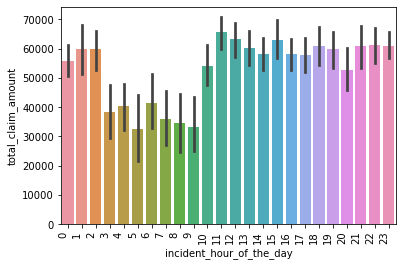

In [116]:
chart=sns.barplot(x='incident_hour_of_the_day',y='total_claim_amount',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Incident hour with in 11-23 hrs has higher accident rate as per insurance claimed 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

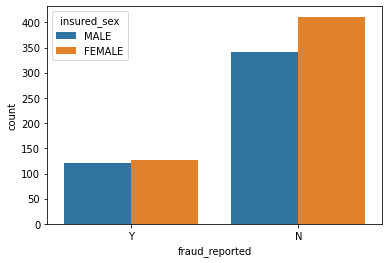

In [117]:
sns.countplot(x='fraud_reported',hue='insured_sex',data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

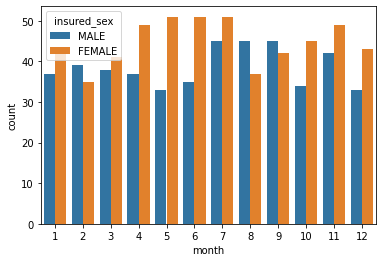

In [118]:
sns.countplot(x='month',hue='insured_sex',data=df)

In summer and monsoon season female has claimed insurance more

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

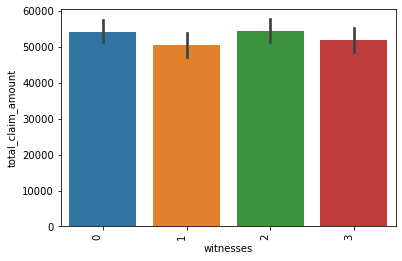

In [119]:
chart=sns.barplot(x='witnesses',y='total_claim_amount',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

witness number is not effecting much in total claim amount

In [120]:
sns.countplot(x='witnesses',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

The chances of being fraud is more in case of positive number of witnesses

In [121]:
sns.histplot(x='policy_annual_premium',data=df,hue='fraud_reported')

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

The fraud claim applicant's annual premium ranges frm 1000 to 1600 mostly

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

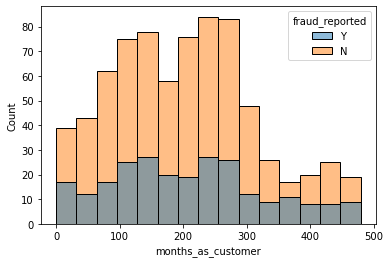

In [122]:
sns.histplot(x='months_as_customer',data=df,hue='fraud_reported')

(i) Longtime customer do not apply for fraud claim

(ii) Max fraud claim applicant has customer relationsip with in  two years 

[Text(0, 0, '1995'),
 Text(1, 0, '1996'),
 Text(2, 0, '1997'),
 Text(3, 0, '1998'),
 Text(4, 0, '1999'),
 Text(5, 0, '2000'),
 Text(6, 0, '2001'),
 Text(7, 0, '2002'),
 Text(8, 0, '2003'),
 Text(9, 0, '2004'),
 Text(10, 0, '2005'),
 Text(11, 0, '2006'),
 Text(12, 0, '2007'),
 Text(13, 0, '2008'),
 Text(14, 0, '2009'),
 Text(15, 0, '2010'),
 Text(16, 0, '2011'),
 Text(17, 0, '2012'),
 Text(18, 0, '2013'),
 Text(19, 0, '2014'),
 Text(20, 0, '2015')]

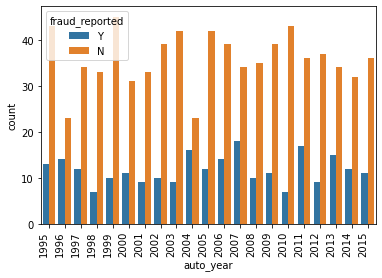

In [123]:
chart=sns.countplot(x='auto_year',hue='fraud_reported',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Age of vehicle seems to not so important to detect the fraud of insurance

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

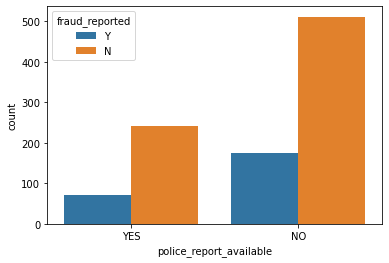

In [124]:
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)

Fraud reporting chaces is more if the case not been reported to police

In [125]:
sns.pairplot(df)

In [126]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'month', 'day', 'year'],
      dtype='object')

<AxesSubplot:>

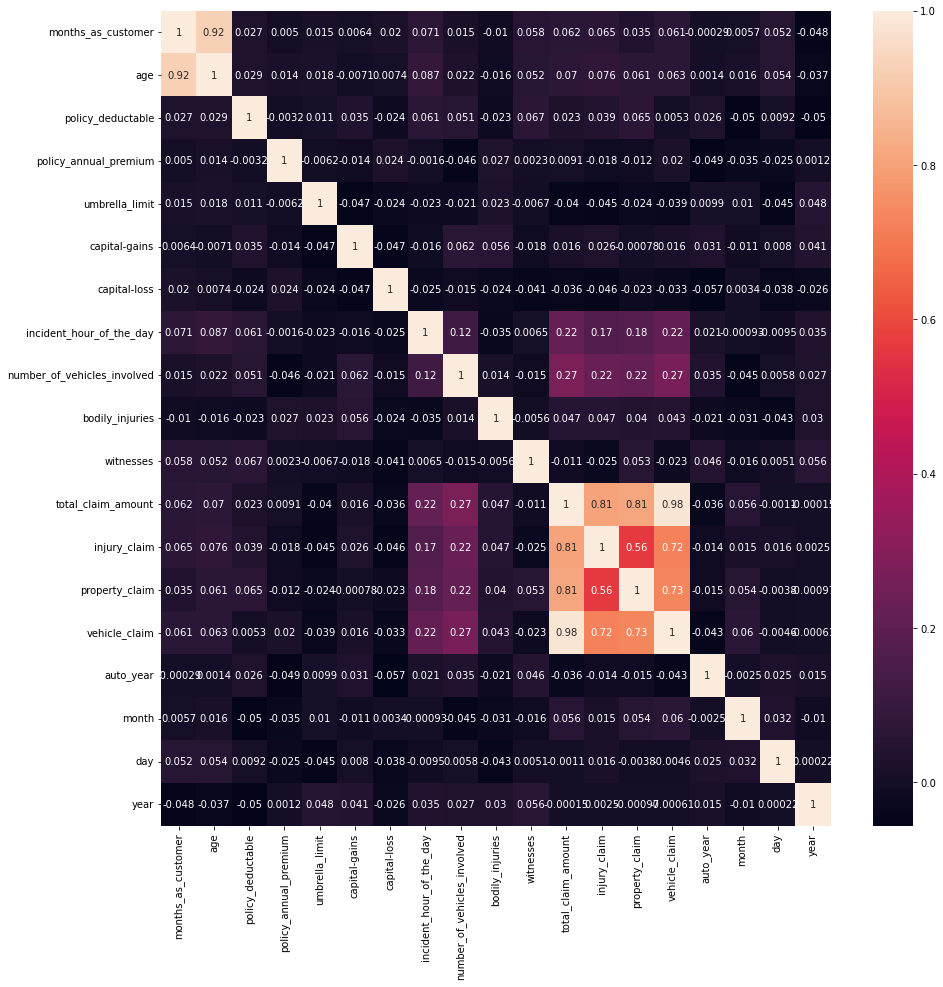

In [127]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

# Cheking for outliers

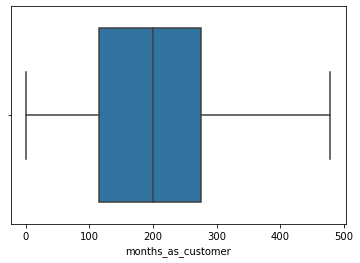

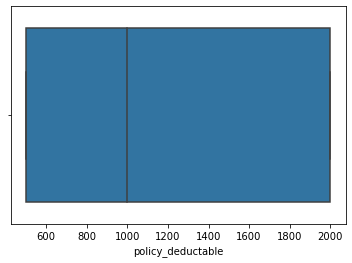

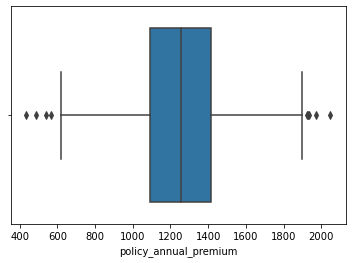

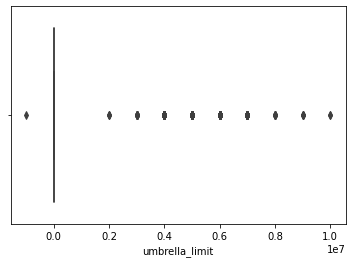

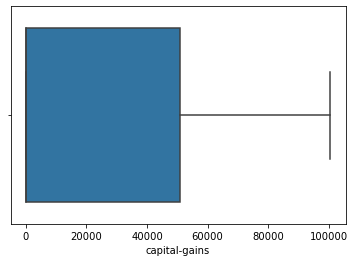

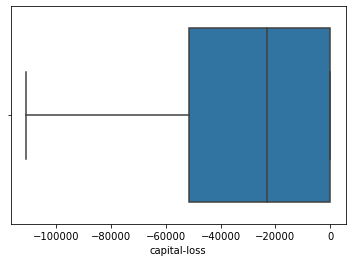

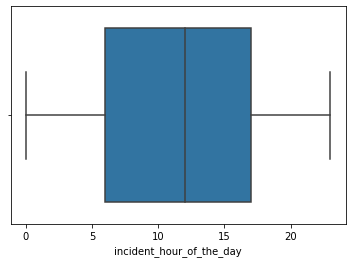

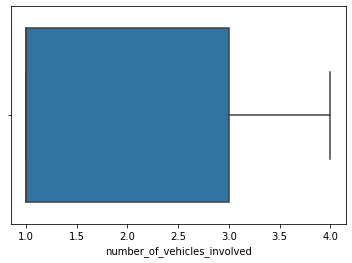

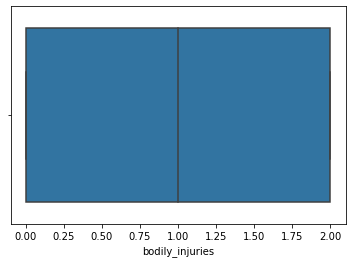

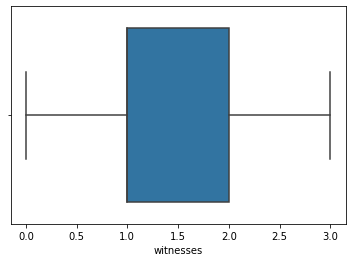

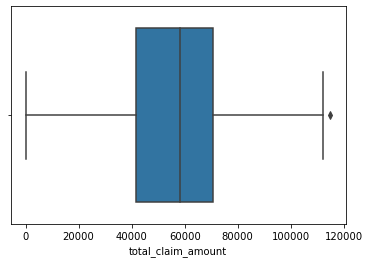

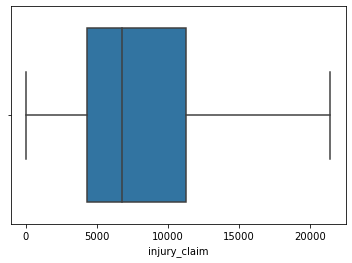

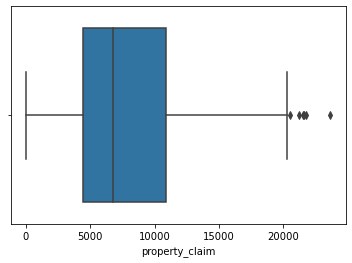

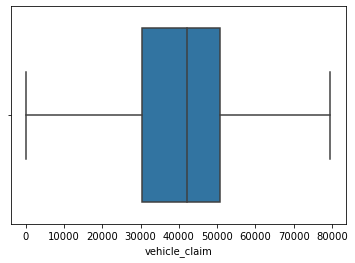

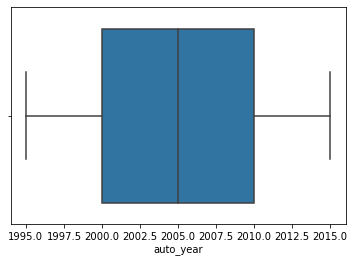

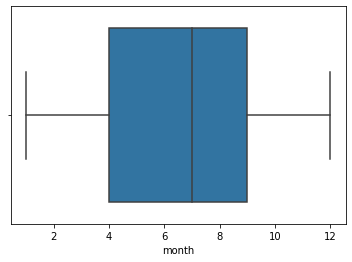

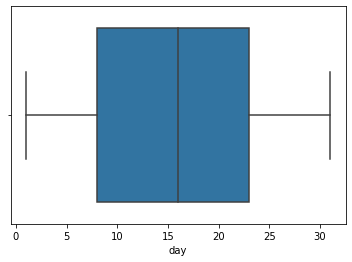

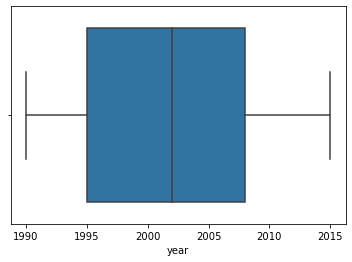

In [129]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(df[i])
        plt.show()

There is outliers in Property_claims and Policy_annual_premium


In [130]:
#features with outliers
features=df[['property_claim','policy_annual_premium']]

In [131]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [132]:
df.shape

(1000, 37)

In [133]:
df=df[(z<3).all(axis=1)]

In [134]:
df.shape

(996, 37)

In [135]:
loss=(1000-996)*100/996
loss

0.40160642570281124

0.4 % loss of data is acceptable

# Encoding of data 

In [136]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [137]:
le=LabelEncoder()
oe=OrdinalEncoder()

In [138]:
# label for which columns are in some order like insured_sex,propert_damage etc.
# for rest of them we will use ordinal encoder

df['policy_state']=le.fit_transform(df['policy_state'].values.reshape(-1,1))
df['insured_sex']=le.fit_transform(df['insured_sex'].values.reshape(-1,1))
df['collision_type']=le.fit_transform(df['collision_type'].values.reshape(-1,1))
df['property_damage']=le.fit_transform(df['property_damage'].values.reshape(-1,1))
df['police_report_available']=le.fit_transform(df['police_report_available'].values.reshape(-1,1))
df['fraud_reported']=le.fit_transform(df['fraud_reported'].values.reshape(-1,1))

df['insured_education_level']=oe.fit_transform(df['insured_education_level'].values.reshape(-1,1))
df['insured_occupation']=oe.fit_transform(df['insured_occupation'].values.reshape(-1,1))
df['insured_hobbies']=oe.fit_transform(df['insured_hobbies'].values.reshape(-1,1))
df['insured_relationship']=oe.fit_transform(df['insured_relationship'].values.reshape(-1,1))
df['incident_type']=oe.fit_transform(df['incident_type'].values.reshape(-1,1))
df['incident_severity']=oe.fit_transform(df['incident_severity'].values.reshape(-1,1))
df['authorities_contacted']=oe.fit_transform(df['authorities_contacted'].values.reshape(-1,1))
df['incident_state']=oe.fit_transform(df['incident_state'].values.reshape(-1,1))
df['incident_city']=oe.fit_transform(df['incident_city'].values.reshape(-1,1))
df['auto_make']=oe.fit_transform(df['auto_make'].values.reshape(-1,1))


In [139]:
df.drop('incident_location',axis=1,inplace=True)

Dropped the column as its not necessary for prediction

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           996 non-null    int64  
 1   age                          996 non-null    int64  
 2   policy_state                 996 non-null    int32  
 3   policy_deductable            996 non-null    int64  
 4   policy_annual_premium        996 non-null    float64
 5   umbrella_limit               996 non-null    int64  
 6   insured_sex                  996 non-null    int32  
 7   insured_education_level      996 non-null    float64
 8   insured_occupation           996 non-null    float64
 9   insured_hobbies              996 non-null    float64
 10  insured_relationship         996 non-null    float64
 11  capital-gains                996 non-null    int64  
 12  capital-loss                 996 non-null    int64  
 13  incident_type       

In [141]:
df.drop('auto_model',axis=1,inplace=True)

Dropped the auto_model column , which is not necwssary feature for predicting the fraud_claim

# Correlation

<AxesSubplot:>

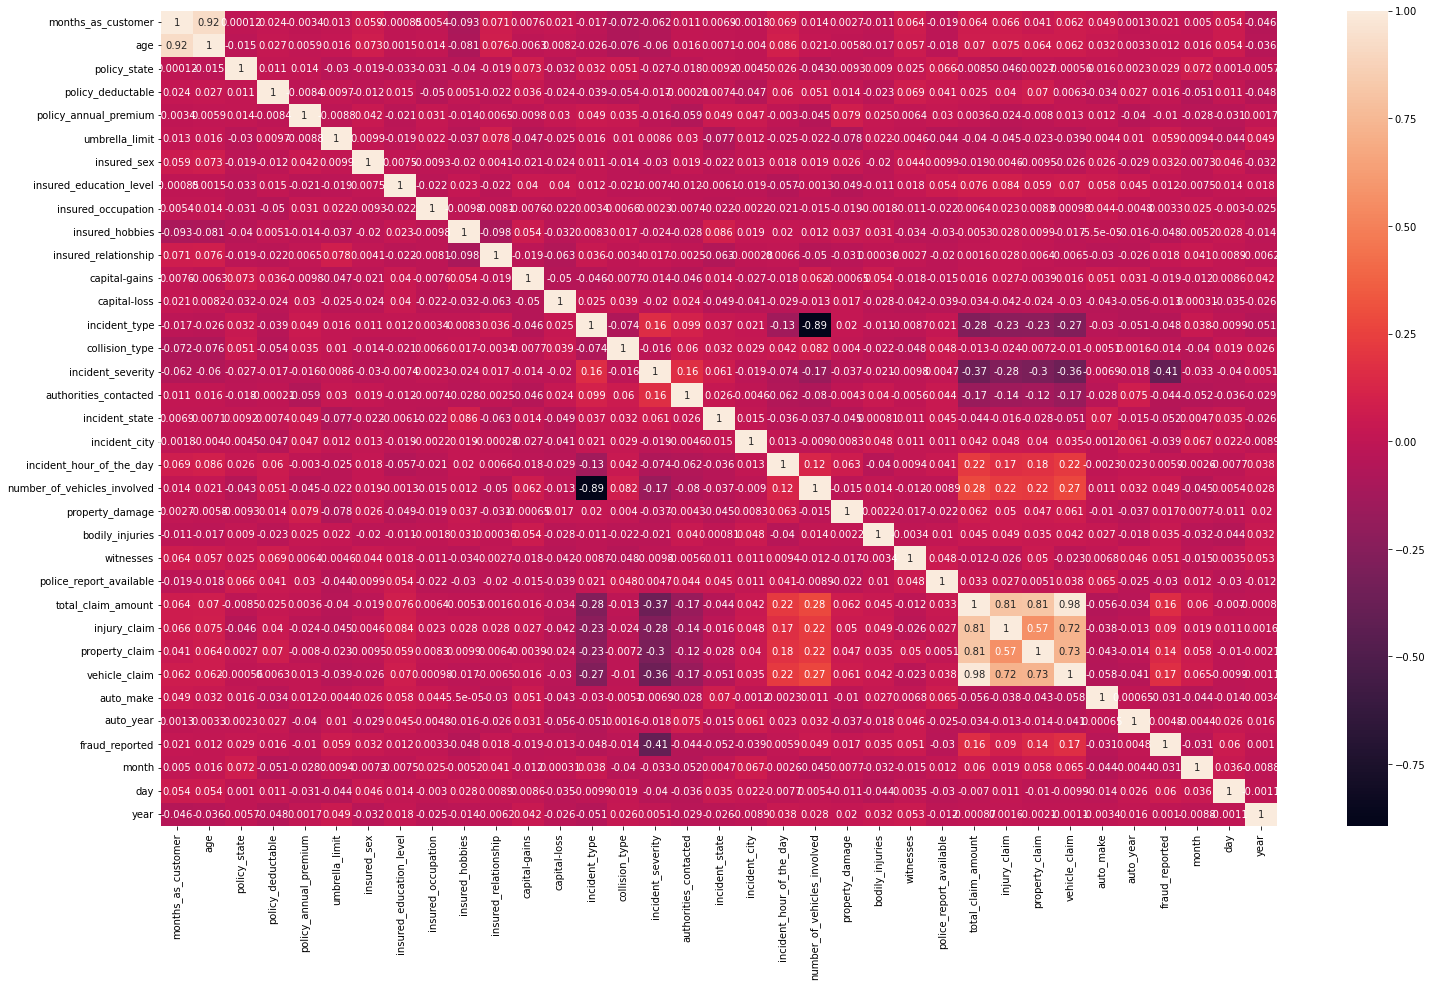

In [142]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

(i) Months as a customer and age is highly correlated

(ii) There is availabilty of multicolinearity

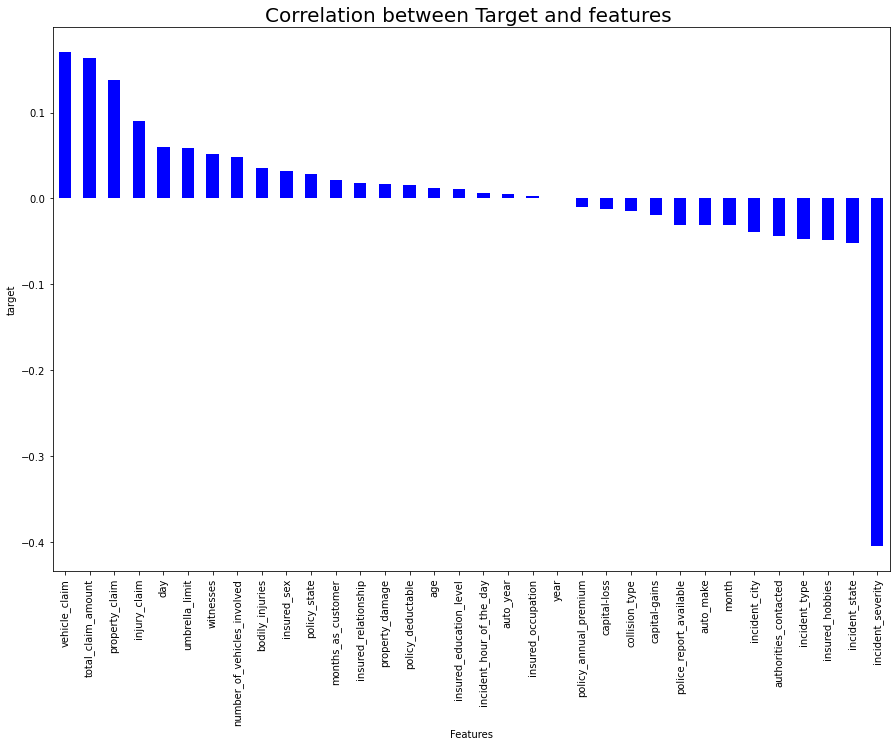

In [143]:
# generationg corraltion bar graph
plt.figure(figsize=(15,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

Positively correlated features are:
(i) Vehicle_claim

(ii) total_claim_amount

(iii) property_claim

(iv) injury_claim

(v) day of insurance

Negatively correlated features are:
    
(i) Incident severity

(ii) Incident State

In [147]:
df.skew()

months_as_customer             0.359605
age                            0.474526
policy_state                  -0.028155
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                 1.800271
insured_sex                    0.145176
insured_education_level        0.001349
insured_occupation            -0.063714
insured_hobbies               -0.060160
insured_relationship           0.076423
capital-gains                  0.478850
capital-loss                  -0.393015
incident_type                  0.102917
collision_type                -0.033826
incident_severity              0.275635
authorities_contacted         -0.120741
incident_state                -0.144616
incident_city                  0.046459
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
property_damage                0.857547
bodily_injuries                0.011117
witnesses                      0.025758
police_report_available        0.806478


In [148]:
#selected skewed features (only int/float)
skewd_features=['umbrella_limit','vehicle_claim']

In [149]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method='yeo-johnson')
df[skewd_features]=scaler.fit_transform(df[skewd_features].values)
df.skew()

months_as_customer             0.359605
age                            0.474526
policy_state                  -0.028155
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                -7.837664
insured_sex                    0.145176
insured_education_level        0.001349
insured_occupation            -0.063714
insured_hobbies               -0.060160
insured_relationship           0.076423
capital-gains                  0.478850
capital-loss                  -0.393015
incident_type                  0.102917
collision_type                -0.033826
incident_severity              0.275635
authorities_contacted         -0.120741
incident_state                -0.144616
incident_city                  0.046459
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
property_damage                0.857547
bodily_injuries                0.011117
witnesses                      0.025758
police_report_available        0.806478


All skewness removed exept sthe the target columns

# Splitting of Target and Features

In [150]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Scaling Of Features

In [154]:
int_features=['months_as_customer','age','policy_annual_premium',
'policy_deductable','umbrella_limit','capital-gains',
'capital-loss','number_of_vehicles_involved',
'bodily_injuries','witnesses','total_claim_amount','injury_claim',
'property_claim','vehicle_claim']


In [156]:
#Scaling of Features using MinmaxScaler
from sklearn.preprocessing import minmax_scale
x[int_features]=minmax_scale(x[int_features])

# MultiCollinearity

In [157]:
# checking the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

vif                     Features
0      28.448784           months_as_customer
1      39.577328                          age
2       2.587884                 policy_state
3       2.177927            policy_deductable
4      10.312704        policy_annual_premium
5     434.777338               umbrella_limit
6       1.912873                  insured_sex
7       3.429049      insured_education_level
8       3.810579           insured_occupation
9       4.135355              insured_hobbies
10      3.174139         insured_relationship
11      1.868427                capital-gains
12     10.370471                 capital-loss
13     11.062618                incident_type
14      3.099587               collision_type
15      3.198815            incident_severity
16      3.308877        authorities_contacted
17      3.380944               incident_state
18      3.202339                incident_city
19      4.231095     incident_hour_of_the_day
20      8.639586  number_of_vehicles_involved
21      1.489883              property_damage
22      2.542400              bodily_injuries
23      2.878092                    witnesses
24      1.509495      police_report_available
25  13175.872785           total_claim_amount
26    317.180136                 injury_claim
27    310.379281               property_claim
28   6257.950070                vehicle_claim
29      3.786099                    auto_make
30  46147.121314                    auto_year
31      4.929685                        month
32      4.131187                          day
33  46353.399824                         year

# PCA

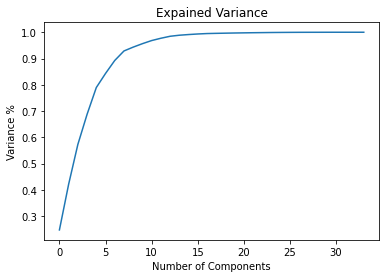

In [158]:
# determining the number of features required for best accuarcy
from sklearn.decomposition import PCA
pca=PCA()
principleComponents =pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Expained Variance')
plt.show()

25 features are enough for 95 % accuracy

# Selecting K Best Features

In [159]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat=SelectKBest(score_func=f_classif,k=17)
fit=bestfeat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(30,'Score'))

                        Feature       Score
15            incident_severity  195.361320
28                vehicle_claim   29.175046
25           total_claim_amount   27.451602
27               property_claim   19.460535
26                 injury_claim    8.099000
32                          day    3.562059
5                umbrella_limit    3.158864
17               incident_state    2.646854
23                    witnesses    2.621027
20  number_of_vehicles_involved    2.354487
9               insured_hobbies    2.293819
13                incident_type    2.281139
16        authorities_contacted    1.899728
18                incident_city    1.479034
22              bodily_injuries    1.253161
6                   insured_sex    1.029938
31                        month    0.973990
29                    auto_make    0.972307
24      police_report_available    0.920619
2                  policy_state    0.828830
0            months_as_customer    0.437138
11                capital-gains 

In [160]:
df.drop(['insured_relationship','property_damage','policy_deductable'
         ,'collision_type','capital-loss','age','insured_education_level'
         ,'policy_annual_premium'],inplace=True,axis=1)

# Class Imbalance

In [161]:
# solving the class imbalance problem
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

# Best Random State for Model Building

In [163]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)


Best Accuracy is 0.9173333333333333  on Random state 78


In [164]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


In [165]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=80)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [166]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [167]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.7546666666666667
[[138  46]
 [ 46 145]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       184
           1       0.76      0.76      0.76       191

    accuracy                           0.75       375
   macro avg       0.75      0.75      0.75       375
weighted avg       0.75      0.75      0.75       375

----------------------------------------
DecisionTreeClassifier()
0.8346666666666667
[[158  26]
 [ 36 155]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       184
           1       0.86      0.81      0.83       191

    accuracy                           0.83       375
   macro avg       0.84      0.84      0.83       375
weighted avg       0.84      0.83      0.83       375

----------------------------------------
RandomForestClassifier()
0.896
[[170  14]
 [ 25 166]]
              precision    recall  f1-score   support

           0       0.87  

# Cross Validation

In [168]:
#checking the cross validation score
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.7313333333333334
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.8206666666666667
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.8613333333333333
----------------------------------------
Mean Accuracy of  GaussianNB()
0.7020000000000001
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.7133333333333334
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.8466666666666667
----------------------------------------


# RUC_AUC Score

AUC Score of  LogisticRegression()
0.7642372591494698




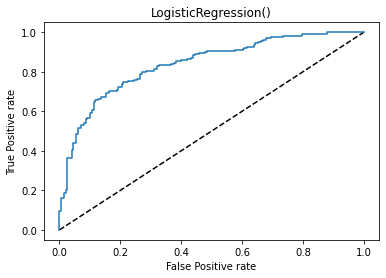

----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.9491078554326758




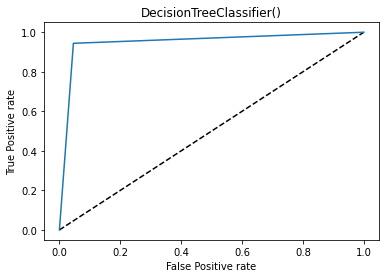

----------------------------------------
AUC Score of  RandomForestClassifier()
0.9679341010147077




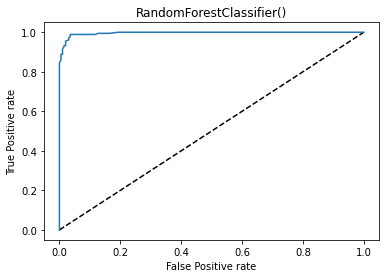

----------------------------------------
AUC Score of  GaussianNB()
0.7536626382396534




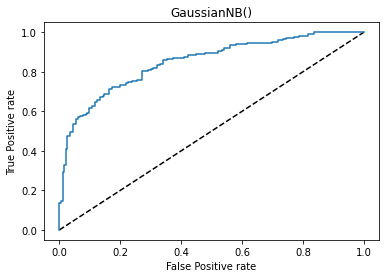

----------------------------------------
AUC Score of  KNeighborsClassifier()
0.7626410899555354




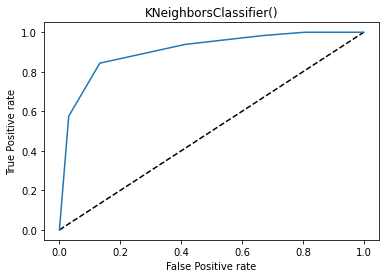

----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.9353836506669707




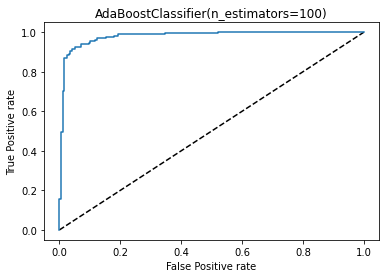

----------------------------------------


In [169]:
# checkinga 
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

After comparing all the model we found RandomForestClassifier is
the best model with 89% accuracy, 86% cross validation and 96% AUC_RUC Score

# Hyper Parameter Tuning

In [170]:
#setting the parameters for best tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[80,100,200,300],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'max_features':['auto','sqrt','log2'],'min_samples_split':[2,3,4,5]}


In [171]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)`````````````
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 200}

In [173]:
#Finding the accuracy with best parameters
final_mod=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=3,n_estimators=200,max_features='log2')
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.93333333333332


Found the model is performing at  98 % accuracy and ready to save

# Saving the Model

In [174]:
#saving the model for future use
import joblib
joblib.dump(final_mod,'Insurance_fraud_reporting.obj')

['Insurance_fraud_reporting.obj']

Saved the model for future usage